In [19]:
import sympy as sm
from sympy import oo
from sympy import init_printing
from IPython.display import display, Math
from sympy.series.fourier import fourier_series
init_printing()
x,z = sm.symbols("x z")

tau = sm.symbols("tau")

A = 3

fTau = sm.exp((-1 * tau**2)/(2*A**2))

gXandTau = sm.exp((-1 * (x-tau)**2)/(2*((tau)/5)**2))

taylorExpand = fourier_series(gXandTau,(tau, -100,100))

cleanedTaylorExpand = taylorExpand.removeO()

cleanedTaylorExpand

#intergrated = sm.integrate(fTau * cleanedTaylorExpand, (tau, -oo, oo) )
#intergrated

KeyboardInterrupt: 

0.5916276925388739


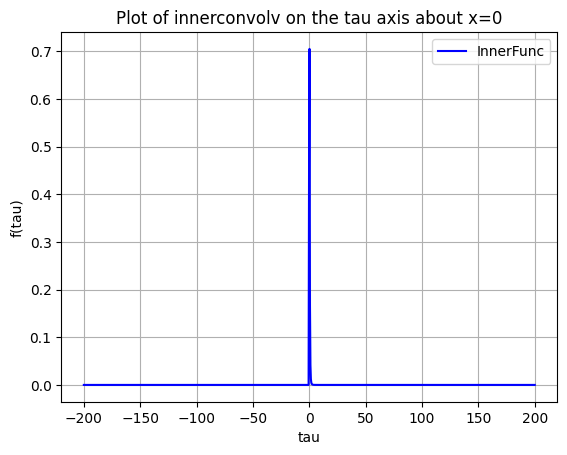

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


lowerLimInt = -200
upperLimInt = 200

xval = 20

def innerConvolvFunc(tau,xVal):
    return np.exp((-1 * tau**2)/(2*3**2)) * np.exp((-1 * (xVal-tau)**2)/(2*((tau+1)/5)**2))


def numericalIntegration(func, lowLim, upLim, subInt=1000):

    height = (upLim - lowLim) / subInt
    result = 0.5 * (func(lowLim,xval) + func(upLim,xval))
    for i in range(1, subInt):
        result += func(lowLim + i * height, xval)
    return result * height

areaUnderCurve = numericalIntegration(innerConvolvFunc,lowerLimInt,upperLimInt)

tau_vals = np.linspace(lowerLimInt, upperLimInt, 1000)
y_vals = innerConvolvFunc(tau_vals,0)

plt.plot(tau_vals, y_vals, label='InnerFunc', color='blue')
plt.fill_between(tau_vals, y_vals, alpha=0.3, color='skyblue')
plt.title('Plot of innerconvolv on the tau axis about x=0')
plt.xlabel('tau')
plt.ylabel('f(tau)')
plt.legend()
plt.grid(True)

print(areaUnderCurve)

plt.show()

30.18319450711686


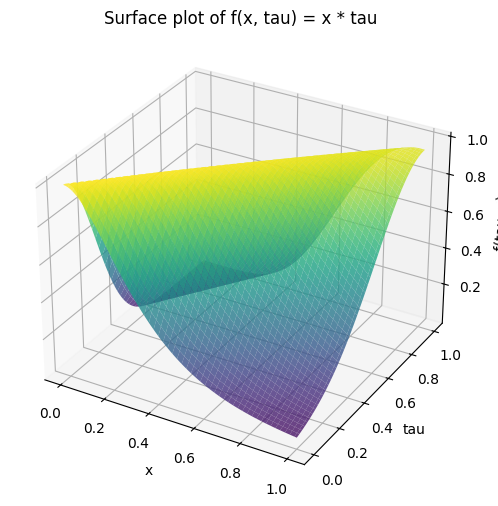

In [ ]:
import numpy as np

tauLowerLim = -200
tauUpperLim = 200
xLowerLim = -200
xUpperLim = 200

def innerConvolvFunc(tau,xVal):
    return np.exp((-1 * tau**2)/(2*3**2)) * np.exp((-1 * (xVal-tau)**2)/(2*((tau+1)/5)**2))


def double_integral(f, ax, bx, ay, by, nx=100, ny=100):
    """
    Approximate the double integral of f(x, tau) over the rectangle [ax,bx] x [ay,by].

    Parameters:
        f:   function of two variables f(x, y)
        ax:  lower bound in x
        bx:  upper bound in x
        ay:  lower bound in y
        by:  upper bound in y
        nx:  number of subdivisions in x
        ny:  number of subdivisions in y

    Returns:
        Approximate value of the double integral
    """
    hx = (bx - ax) / nx
    hy = (by - ay) / ny

    x = np.linspace(ax, bx, nx + 1)
    y = np.linspace(ay, by, ny + 1)

    total = 0
    for i in range(nx + 1):
        for j in range(ny + 1):
            weight = 1
            if i == 0 or i == nx:
                weight *= 0.5
            if j == 0 or j == ny:
                weight *= 0.5
            total += weight * f(x[i], y[j])

    return hx * hy * total

areaUnderCurve = double_integral(innerConvolvFunc,xLowerLim,xUpperLim,tauLowerLim,tauUpperLim)

import matplotlib.pyplot as plt

# Define the function of two variables


# Create meshgrid for surface plot
x = np.linspace(0, 1, 100)
tau = np.linspace(0, 1, 100)
X, TAU = np.meshgrid(x, tau)
Z = innerConvolvFunc(X, TAU)

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, TAU, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_title('Surface plot of f(x, tau) = x * tau')
ax.set_xlabel('x')
ax.set_ylabel('tau')
ax.set_zlabel('f(tau, x)')

print(areaUnderCurve)

plt.show()